# IDC Breast Cancer Detection

Deep Learning Project by Sanae Oubenyahya & Yosra Chemssi

In [7]:
import numpy as np
import pandas as pd
import os
from glob import glob
import itertools
import fnmatch
import random
import matplotlib.pylab as plt
import cv2
import seaborn as sns
import fnmatch
import sklearn
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedKFold, learning_curve, GridSearchCV
from sklearn.metrics import confusion_matrix, make_scorer, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import keras
from keras import backend as K
from keras.callbacks import History
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.models import Sequential, model_from_json
from keras.optimizers import SGD, RMSprop, Adam, Adagrad, Adadelta
from keras.layers import Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPool2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator
import numpy
import fnmatch
%matplotlib inline


Using TensorFlow backend.


## Loading the data

In [1]:
!pip install pyunpack
!pip install patool
from pyunpack import Archive
Archive(r'C:\Users\Nymphea LAP\Desktop\Courses\Image Processing\IDC_regular_ps50_idx5.rar').extractall(r'C:\Users\Nymphea LAP\Desktop\Courses\idk')

In [1]:
from glob import glob
imagePatches = glob(r'C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\**\*.png', recursive=True)
for filename in imagePatches[0:7]:
    print(filename)

C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1001_class0.png
C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1051_class0.png
C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1101_class0.png
C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1151_class0.png
C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1201_class0.png
C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1251_class0.png
C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\10253\0\10253_idx5_x1001_y1301_class0.png


In [8]:
patternZero = '*class0.png'
patternOne = '*class1.png'
classZero = fnmatch.filter(imagePatches, patternZero)
classOne = fnmatch.filter(imagePatches, patternOne)
print("IDC(-)\n\n",classZero[0:3], '\n')
print("IDC(+)\n\n",classOne[0:3])


IDC(-)

 ['C:\\Users\\Nymphea LAP\\Desktop\\Courses\\idk\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1001_class0.png', 'C:\\Users\\Nymphea LAP\\Desktop\\Courses\\idk\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1051_class0.png', 'C:\\Users\\Nymphea LAP\\Desktop\\Courses\\idk\\IDC_regular_ps50_idx5\\10253\\0\\10253_idx5_x1001_y1101_class0.png'] 

IDC(+)

 ['C:\\Users\\Nymphea LAP\\Desktop\\Courses\\idk\\IDC_regular_ps50_idx5\\10253\\1\\10253_idx5_x501_y351_class1.png', 'C:\\Users\\Nymphea LAP\\Desktop\\Courses\\idk\\IDC_regular_ps50_idx5\\10253\\1\\10253_idx5_x501_y401_class1.png', 'C:\\Users\\Nymphea LAP\\Desktop\\Courses\\idk\\IDC_regular_ps50_idx5\\10253\\1\\10253_idx5_x551_y301_class1.png']


In [9]:
def read_img(img):
  img = cv2.imread(img)
  img = cv2.resize(img, (50,50))
  
  return img

## Data Analysis

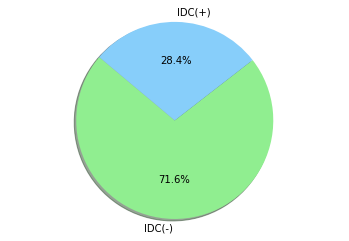

In [10]:
#Negative and positive cases percentages
labels = 'IDC(-)', 'IDC(+)'
sizes = [len(classZero), len(classOne)]
colors = ['lightgreen','lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

## Data Augmentation

In [11]:
def augmentation1(img):               #Flip horrizontally
  img = cv2.imread(img)
  img = cv2.resize(img, (50,50))
  augmented_img = np.fliplr(img)

  return augmented_img

def augmentation2(img):               #Flip vertically
  img = cv2.imread(img)
  img = cv2.resize(img, (50,50))
  augmented_img = np.flipud(img)

  return augmented_img

def noisy(image_name):        #for noisyy images
  image = cv2.imread(image_name)      #rescaling it in order to be more realistic
  noisy = np.random.poisson(image / 255.0  * 300) /300 * 255
  noisy = cv2.resize(noisy, (50,50))
  noisy = noisy.astype(numpy.uint8)
  return noisy



### Testing on an original image from dataset 

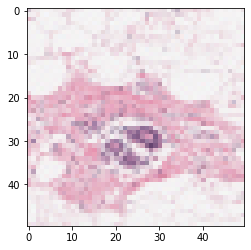

In [12]:
image_name = r'C:\Users\Nymphea LAP\Desktop\Courses\idk\IDC_regular_ps50_idx5\9135\0\9135_idx5_x1001_y1001_class0.png'  #image used
image = cv2.imread(image_name)
image = cv2.resize(image, (50,50))
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

### Output Image of augmentation process

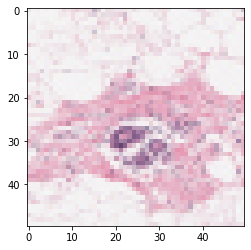

In [13]:
image = augmentation1(image_name)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

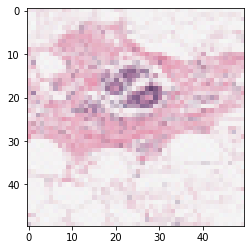

In [14]:
image = augmentation2(image_name)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

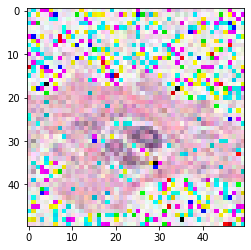

In [15]:
image = noisy(image_name)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [16]:
X = []
Y = []
WIDTH = 50
HEIGHT = 50
for img in imagePatches[0:9000]:
    X.append(read_img(img))
    if img in classZero:
        Y.append(0)
    elif img in classOne:   #if this exact image is (+), we'll apply data augmentation to it
        a1img = augmentation1(img)
        a2img = augmentation2(img)
        nimg = noisy(img)
        X.append(a1img)
        X.append(a2img)
        X.append(nimg)
        Y.append(1)
        Y.append(1)
        Y.append(1)
        Y.append(1)
    else:
        break

    


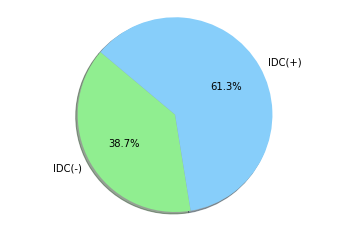

In [17]:
labels = 'IDC(-)', 'IDC(+)'
sizes = [len(classZero), len(classOne)*4]
colors = ['lightgreen','lightskyblue']

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()


In [18]:
X=np.array(X)
#We gonna split the dataset in 80:20 for training and validating
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (11692, 50, 50, 3)
Testing Data Shape: (2924, 50, 50, 3)


In [21]:
imgs0 = []
imgs1 = []
for x in range(500):
  if Y_train[x] == 1:
    imgs1.append(X_train[x])
  if Y_train[x] == 0:
    imgs0.append(X_train[x])
  


We will display some images which have labels IDC(-) (diagnosis negative) and IDC(+) (diagnosis positive) to give us a hint what is the difference between them.

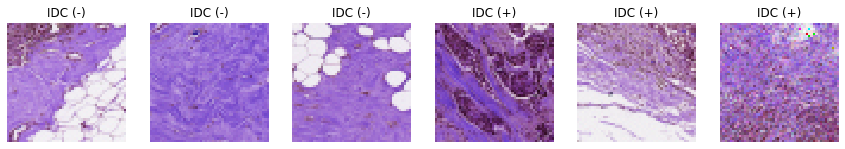

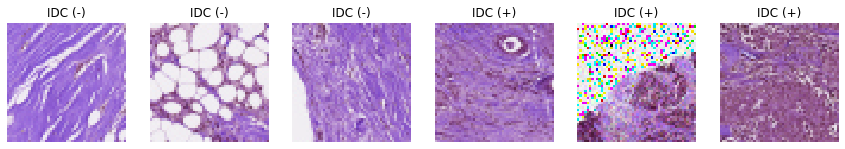

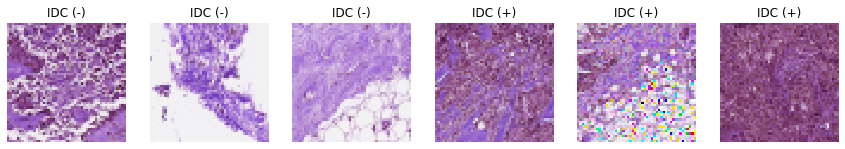

In [22]:
for row in range(3):
    plt.figure(figsize=(20, 10))
    for col in range(3):
        plt.subplot(1,8,col+1)
        plt.title('IDC (-)')
        plt.imshow(imgs0[0+4*row+col])
        plt.axis('off')
        plt.subplot(1,8,col+4)
        plt.title('IDC (+)')
        plt.imshow(imgs1[0+4*row+col])
        plt.axis('off')

## Build the Model

In [23]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),
                activation='relu',
                input_shape=(50,50,3),
                strides=2))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 24, 24, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 11, 11, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7744)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               991360    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)              

In [24]:
#In here, we're using data generator which can randomly modify our data in order to avoid overfitting.
datagen = ImageDataGenerator(
      rotation_range=90,
      width_shift_range=0.2,
      height_shift_range=0.2,
      horizontal_flip=True,
      shear_range=0.2,
      zoom_range=0.2,
      vertical_flip=True)

In [36]:
model.compile(loss='binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [60]:
from keras.callbacks import History
history = History()
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=32), steps_per_epoch=len(X_train) /32, nb_epoch = 20, validation_data = ( X[:20], Y[:20] ))

Epoch 1/20
  2/365 [..............................] - ETA: 23s - loss: 0.4319 - accuracy: 0.8594

C:\Users\Nymphea LAP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nymphea LAP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=365.375, validation_data=(array([[[..., epochs=20)`
  This is separate from the ipykernel package so we can avoid doing imports until


366/365 [==============================] - 26s 70ms/step - loss: 0.4361 - accuracy: 0.8191 - val_loss: 0.5053 - val_accuracy: 0.7500
Epoch 2/20
366/365 [==============================] - 29s 78ms/step - loss: 0.4236 - accuracy: 0.8175 - val_loss: 0.4397 - val_accuracy: 0.7500
Epoch 3/20
366/365 [==============================] - 28s 78ms/step - loss: 0.4100 - accuracy: 0.8277 - val_loss: 0.2414 - val_accuracy: 1.0000
Epoch 4/20
366/365 [==============================] - 28s 77ms/step - loss: 0.3978 - accuracy: 0.8313 - val_loss: 0.7814 - val_accuracy: 0.4000
Epoch 5/20
366/365 [==============================] - 28s 78ms/step - loss: 0.4046 - accuracy: 0.8314 - val_loss: 0.2782 - val_accuracy: 0.8500
Epoch 6/20
366/365 [==============================] - 29s 79ms/step - loss: 0.4145 - accuracy: 0.8236 - val_loss: 0.4461 - val_accuracy: 0.8000
Epoch 7/20
366/365 [==============================] - 29s 79ms/step - loss: 0.4373 - accuracy: 0.8156 - val_loss: 0.2965 - val_accuracy: 0.8500
Epo

<Figure size 432x288 with 0 Axes>

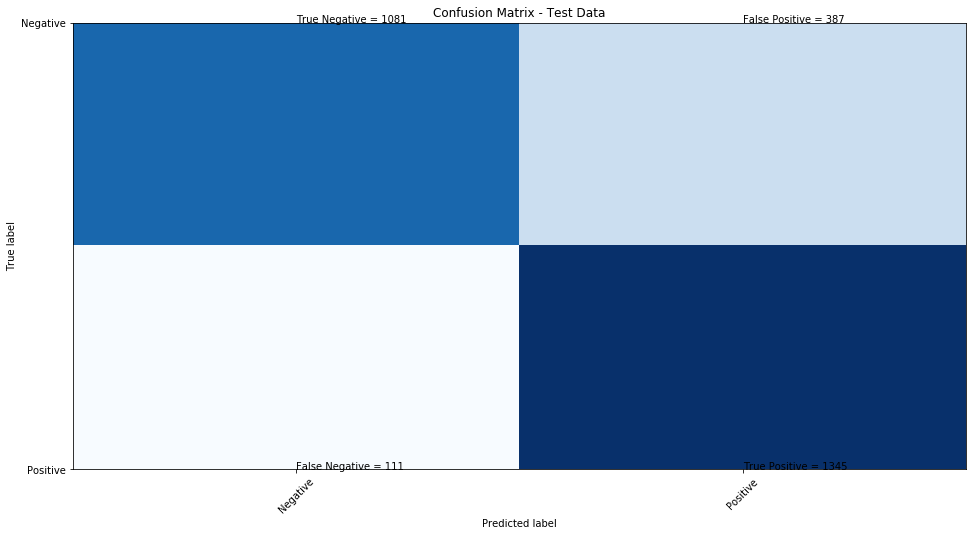

In [63]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(Y_test, y_pred)
plt.clf()
plt.figure(figsize = (16,11))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
ticks = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
tick_marks = np.arange(len(ticks))
plt.xticks(tick_marks, ticks, rotation=45)
plt.yticks(tick_marks, ticks)
s = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

## Transfer Learning

We'll apply transefer learning by the vgg 16 model. We'll take all the convolutional ayers only and add fully connected layer at the top of the model.

We set all the convolutional layers to not trainable. By doing this we can save a lot of time during the training process without losing accuracy.

In [25]:
from keras.layers import Input
from keras.models import Model
from keras.applications.vgg16 import VGG16

model_vgg16_conv = VGG16(weights='imagenet', include_top=False)
model_vgg16_conv.summary()

#Creating our own input format
input = Input(shape=(50,50,3), name = 'image_input')

#Use the generated model
output_vgg16_conv = model_vgg16_conv(input)

for layer in model_vgg16_conv.layers:
    layer.trainable = False
    
#Adding the fully connected layers
x = Flatten(name='flatten')(output_vgg16_conv)
x = Dropout(0.25)(x)
x = Dense(128, activation='relu', name='fc1')(x)
x = Dropout(0.25)(x)
x = Dense(1, activation='sigmoid', name='predictions')(x)

#Creating our own model
my_model = Model(input=input, output=x)

#In the summary, layers and weights fron vgg part will be hidden and fit during training
my_model.summary()



Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, None, None, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0     

C:\Users\Nymphea LAP\Anaconda3\lib\site-packages\ipykernel_launcher.py:25: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("im..., outputs=Tensor("pr...)`


In [26]:
my_model.compile(loss='binary_crossentropy', optimizer= 'adam' , metrics=['accuracy'])

In [27]:
from keras.callbacks import History
history = History()
history = my_model.fit_generator(datagen.flow(X_train,Y_train, batch_size=32), steps_per_epoch=len(X_train) /32, nb_epoch = 20, validation_data = ( X[:500], Y[:500] ))

C:\Users\Nymphea LAP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Nymphea LAP\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras.pre..., steps_per_epoch=365.375, validation_data=(array([[[..., epochs=20)`
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/20
366/365 [==============================] - 644s 2s/step - loss: 1.8204 - accuracy: 0.7290 - val_loss: 0.5544 - val_accuracy: 0.7240
Epoch 2/20
366/365 [==============================] - 684s 2s/step - loss: 0.5717 - accuracy: 0.7686 - val_loss: 0.4710 - val_accuracy: 0.7400
Epoch 3/20
366/365 [==============================] - 615s 2s/step - loss: 0.4779 - accuracy: 0.7950 - val_loss: 0.4967 - val_accuracy: 0.7500
Epoch 4/20
366/365 [==============================] - 563s 2s/step - loss: 0.4600 - accuracy: 0.8030 - val_loss: 0.4476 - val_accuracy: 0.7920
Epoch 5/20
366/365 [==============================] - 515s 1s/step - loss: 0.4449 - accuracy: 0.8110 - val_loss: 0.5523 - val_accuracy: 0.7360
Epoch 6/20
366/365 [==============================] - 507s 1s/step - loss: 0.4327 - accuracy: 0.8134 - val_loss: 0.5213 - val_accuracy: 0.7360
Epoch 7/20
366/365 [==============================] - 502s 1s/step - loss: 0.4331 - accuracy: 0.8147 - val_loss: 0.4799 - val_accuracy: 0.7680

## Performance Analysis

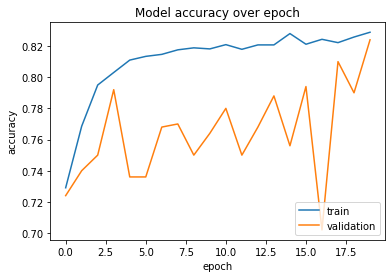

In [28]:
#show the trend of model accuracy over 200 epoch

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Model accuracy over epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()


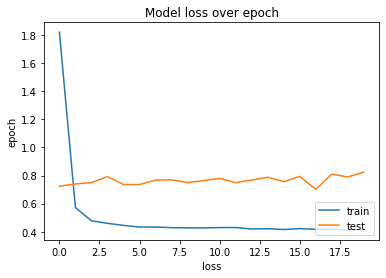

In [29]:
#show the trend of loss over 10 epoches

plt.plot(history.history['loss'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('loss')
plt.ylabel('epoch')
plt.title('Model loss over epoch')
plt.legend(['train', 'test'], loc='lower right')
plt.show()


In [30]:
scores = my_model.evaluate(X_test, Y_test, verbose=False)
print("Accuracy rate: %.2f%%" % (scores[1]*100))
print("Test loss:", scores[0])

Accuracy rate: 84.61%
Test loss: 0.36308084149041026


<Figure size 432x288 with 0 Axes>

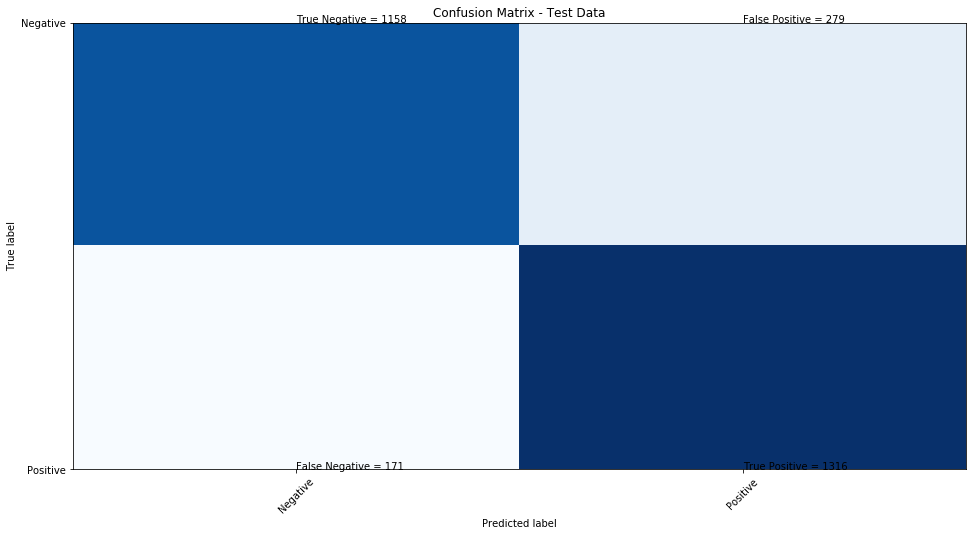

In [31]:
y_pred = my_model.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sn
cm = confusion_matrix(Y_test, y_pred)
plt.clf()
plt.figure(figsize = (16,11))
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
ticks = ['Negative', 'Positive']
plt.title('Confusion Matrix - Test Data')
tick_marks = np.arange(len(ticks))
plt.xticks(tick_marks, ticks, rotation=45)
plt.yticks(tick_marks, ticks)
s = [['True Negative', 'False Positive'], ['False Negative', 'True Positive']]

for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

In [32]:
my_model.save_weights('myModel.h5')

In [33]:
y_pred = my_model.predict(X_test[:10])
y_pred = (y_pred > 0.5)
y_pred

array([[ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True]])

In [34]:
Y_test[:10]

[1, 1, 0, 1, 1, 0, 1, 0, 1, 0]